# 특성 선택과 특성 공학

### 특성 중요도

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[0.2098258  0.02123174 0.16063799 0.01768069 0.14696377 0.03346068
 0.41019935]


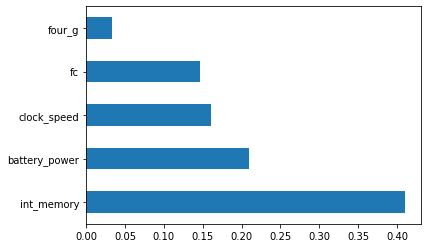

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] # 독립 열
y = data.iloc[:,-1] # 마지막 열 ( y ) 선택

# Tree 기반 분류기는 특성 중요도를 제공함 ! 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# 그래프 그려서 확인
feat_importances = pd.Series(model.feature_importances_, index=X.
columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### SelectKBest

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']

print(scores.nlargest(5,'score')) #print the 5 best features

           specs         score
6     int_memory  20539.050302
0  battery_power  11058.155685
4             fc    290.812265
1           blue     36.976457
3       dual_sim     36.485969


### 상관행렬 히트맵

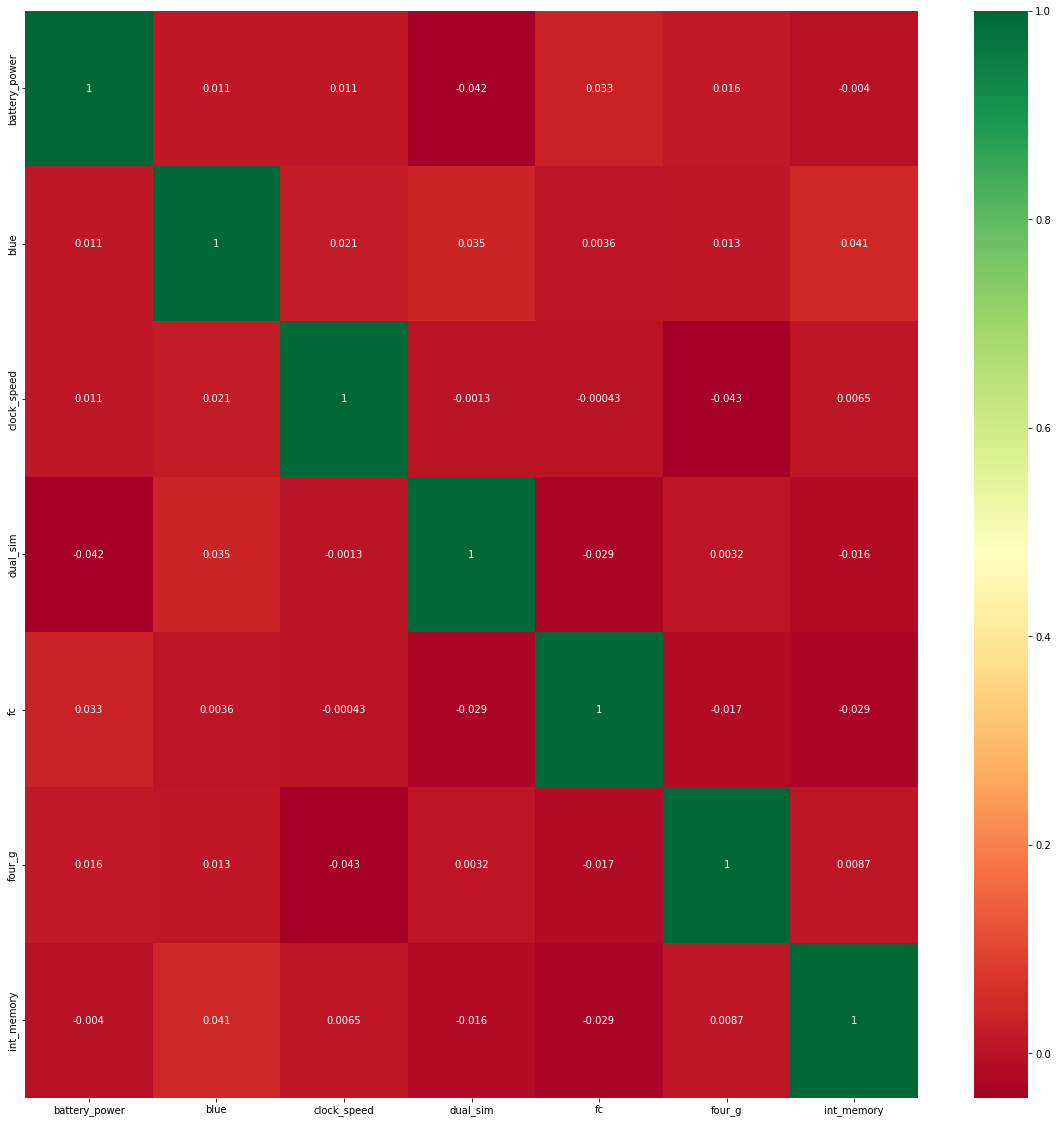

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))

# plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 결측치 처리

### 결측치가 있는 행/열 제거

In [12]:
threshold = 0.6
# 임계값보다 높은 비율의 결측치를 갖는 열 삭제
data = data[data.columns[data.isnull().mean() < threshold]]
# 임계값보다 높은 비율의 결측치를 갖는 행 삭제
data = data.loc[data.isnull().mean(axis=1) < threshold]

print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


### 수치 대치

In [13]:
# 결측치에 0 대입
data = data.fillna(0)
# 결측치를 열의 중앙값으로 대체
data = data.fillna(data.median())
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


### 범주 대치

In [14]:
data = pd.read_csv("dataset.csv")
# 범주형 열에 대한 최대 채우기 기능
data['color'].fillna(data['color'].value_counts().idxmax(),
inplace=True)
print(data)

    index   color
0       0   green
1       1  yellow
2       2    red 
3       3    red 
4       4  purple
5       5    red 
6       6    red 
7       7  purple
8       8    red 
9       9    red 
10     10  yellow
11     11    red 
12     12   black
13     13   white


## 이상치 관리

### 표준 편차 사용

In [15]:
data = pd.read_csv("train.csv")

# 표준 편차를 이용해 이상치 행을 삭제
factor = 2
upper_lim = data['battery_power'].mean () + data['battery_power'].std() * factor
lower_lim = data['battery_power'].mean () - data['battery_power'].std() * factor
data = data[(data['battery_power'] < upper_lim) & (data['battery_power'] > lower_lim)]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


### 백분율 사용

In [17]:
# 백분율 수치 사용해 이상치 행 삭제
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data = data[(data['battery_power'] < upper_lim) & (data['battery_power'] > lower_lim)]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994            858     0          2.2         0   1       0          50
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46

[1917 rows x 7 columns]


In [18]:
# 백분율 수치 사용해 이상치 행 제한
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data.loc[(data['battery_power'] > upper_lim), 'battery_power'] = upper_lim
data.loc[(data['battery_power'] < lower_lim), 'battery_power'] = lower_lim
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0            842.00     0          2.2         0   1       0           7
1           1021.00     1          0.5         1   0       1          53
2            563.00     1          0.5         1   2       1          41
3            615.00     1          2.5         0   0       0          10
4           1821.00     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994         858.00     0          2.2         0   1       0          50
1995         794.00     1          0.5         1   0       1           2
1996        1960.84     1          2.6         1   0       0          39
1997        1911.00     0          0.9         1   1       1          36
1998        1512.00     0          0.9         0   4       1          46

[1917 rows x 7 columns]


## one-hot encoding

In [19]:
# 원 핫 인코딩 ; 범주 특성 -> 숫자 특성
data = pd.read_csv("dataset.csv")
encoded_columns = pd.get_dummies(data['color'])
data = data.join(encoded_columns).drop('color', axis=1)
print(data)

    index  black  green  purple  red   white  yellow
0       0      0      1       0     0      0       0
1       1      0      0       0     0      0       1
2       2      0      0       0     0      0       0
3       3      0      0       0     1      0       0
4       4      0      0       1     0      0       0
5       5      0      0       0     1      0       0
6       6      0      0       0     1      0       0
7       7      0      0       1     0      0       0
8       8      0      0       0     0      0       0
9       9      0      0       0     1      0       0
10     10      0      0       0     0      0       1
11     11      0      0       0     0      0       0
12     12      1      0       0     0      0       0
13     13      0      0       0     0      1       0


## 로그 변환

In [22]:
data = pd.DataFrame({'value':[3,67, -17, 44, 37, 3, 31, -38]})
data['log+1'] = (data['value']+1).transform(np.log)
# 음수 값 로그 변환 ... 값이 다른 것을 출력
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
print(data)

   value     log+1       log
0      3  1.386294  3.737670
1     67  4.219508  4.663439
2    -17       NaN  3.091042
3     44  3.806662  4.418841
4     37  3.637586  4.330733
5      3  1.386294  3.737670
6     31  3.465736  4.248495
7    -38       NaN  0.000000


### 스케일링

In [27]:
# 정규화 ; 최소-최대 정규화
data = pd.DataFrame({'value':[7,25, -47, 73, 8, 22, 53, -25]})
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
print(data)

   value  normalized
0      7    0.450000
1     25    0.600000
2    -47    0.000000
3     73    1.000000
4      8    0.458333
5     22    0.575000
6     53    0.833333
7    -25    0.183333


In [26]:
# 표준화 ; Z-점수 정규화
data = pd.DataFrame({'value':[7,25, -47, 73, 8, 22, 53, -25]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
print(data)

   value  standardized
0      7     -0.193539
1     25      0.270954
2    -47     -1.587017
3     73      1.509601
4      8     -0.167733
5     22      0.193539
6     53      0.993498
7    -25     -1.019303
